In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [87]:
# SYSTEM PARAMETERS
# Gantry
m = 2.0               # Mass of mover + gantry (kg)
r = 0.05              # Radius of the wheel/pulley (m)
u_kinetic = 0.7       # Kinetic friction coefficient

# Runway
v_max = 2.5           # Maximum target speed (m/s)
l_runway = 0.1        # Target runway length (m)

# Motor
stall_torque = 10.0    # Maximum torque at zero speed (Nm)
no_load_ang_vel = 200.0 # No load maximum angular velocity (rad/s)

# SIMULATION PARAMETERS
dt = 0.01             # Time step (s)
t_max = 10            # Max time for integration (s)
num_steps = int(t_max / dt)


In [88]:
# ANALYSIS

# Helper function for motor force based on velocity
def motor_force(v):
    # Convert linear velocity to angular velocity
    ang_velocity = v / r
    # Motor torque as a function of angular velocity
    torque = stall_torque * (1 - ang_velocity / no_load_ang_vel)
    # Convert torque to force (F = T / r)
    return torque / r

# Differential equation for velocity and position
def system_dynamics(t, y):
    v, x = y
    F_motor = motor_force(v)
    F_friction = u_kinetic * m * 9.81  # Friction force
    dv_dt = (F_motor - F_friction) / m
    dx_dt = v
    return [dv_dt, dx_dt]

# Event function to stop when both target distance and velocity are reached simultaneously
def stop_condition(t, y):
    v, x = y

    # Check if both velocity and distance targets are met
    velocity_target_met = v >= v_max
    distance_target_met = x >= l_runway

    if velocity_target_met and distance_target_met:
        print(f"Both target velocity {v_max} m/s and target distance {l_runway} m reached at time {t:.2f} seconds.")
        return 0  # Stop the integration
    
    # Continue integration otherwise
    return 1

# Set the event as terminal to stop integration when it triggers
stop_condition.terminal = True
stop_condition.direction = 1  # Only trigger when approaching from below the target values

# Solving the system of equations with the stop condition
initial_conditions = [0, 0]  # Start from v=0, x=0
solution = solve_ivp(system_dynamics, [0, t_max], initial_conditions, 
                     t_eval=np.arange(0, t_max, dt), events=stop_condition)

# Extracting time, velocity, and position
time = solution.t
velocity = solution.y[0]
position = solution.y[1]

Both target velocity 2.5 m/s and target distance 0.1 m reached at time 0.11 seconds.
Both target velocity 2.5 m/s and target distance 0.1 m reached at time 0.20 seconds.
Both target velocity 2.5 m/s and target distance 0.1 m reached at time 0.11 seconds.
Both target velocity 2.5 m/s and target distance 0.1 m reached at time 0.20 seconds.


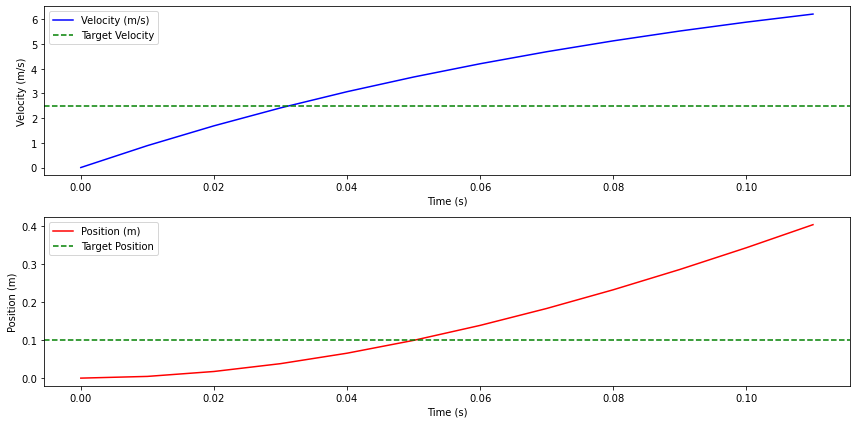

In [89]:
# PLOTTING RESULTS
plt.figure(figsize=(12, 6))

# Plot velocity over time
plt.subplot(2, 1, 1)
plt.plot(time, velocity, label="Velocity (m/s)", color="b")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.axhline(y=v_max, color='g', linestyle='--', label="Target Velocity")
plt.legend()

# Plot position over time
plt.subplot(2, 1, 2)
plt.plot(time, position, label="Position (m)", color="r")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.axhline(y=l_runway, color='g', linestyle='--', label="Target Position")
plt.legend()

plt.tight_layout()
plt.show()